Importing Libraries 


In [23]:
import os
import sys
#from stocker import Stocker
import io
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import pandas_datareader as pdr
import matplotlib.dates as mdates
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import datetime
%config IPCompleter.greedy=True
from matplotlib import style
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pandas.plotting import register_matplotlib_converters

In [25]:
pwd


'/Users/akashghosh/Desktop/AirlinesData'

CSV DATA FOR THE AIRLINES COMPANY (DELTA,QANTAS,AIR CHINA,LUFTHANSA,AMERICAN)

In [26]:
Airchina_df = pd.read_csv('Airchina.csv')
Lufthansa_df = pd.read_csv('Lufthansa.csv')
American_df = pd.read_csv('American.csv')
Delta_df = pd.read_csv('Delta.csv')
Qantas_df = pd.read_csv('Qantas.csv')

In [27]:
style.use('classic')

In [28]:
Airchina_df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-04,18.530001,19.360001,18.530001,19.290001,19.290001,7300
1,2019-11-11,18.840000,18.840000,17.760000,17.760000,17.760000,600
2,2019-11-18,18.250000,18.250000,17.950001,17.950001,17.950001,2300
3,2019-11-25,17.950001,18.360001,17.950001,18.180000,18.180000,1100
4,2019-12-02,18.180000,18.180000,18.180000,18.180000,18.180000,0
5,2019-12-09,18.180000,19.450001,18.020000,19.450001,19.450001,15200
6,2019-12-16,19.450001,20.530001,19.450001,20.090000,20.090000,2100
7,2019-12-23,20.020000,20.450001,19.100000,20.280001,20.280001,19800
8,2019-12-30,20.450001,21.000000,20.450001,21.000000,21.000000,4700
9,2020-01-06,21.000000,21.000000,20.690001,20.690001,20.690001,300


In [6]:
Lufthansa_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-04,17.889999,19.530001,17.639999,19.290001,19.290001,160500
1,2019-11-11,19.469999,19.700001,19.290001,19.540001,19.540001,66700
2,2019-11-18,19.270000,19.760000,18.990000,19.040001,19.040001,57200
3,2019-11-25,18.990000,19.150000,18.930000,19.020000,19.020000,27300
4,2019-12-02,19.110001,19.110001,18.389999,18.900000,18.900000,55600
5,2019-12-09,18.809999,18.900000,18.230000,18.750000,18.750000,98500
6,2019-12-16,19.129999,19.200001,18.389999,18.459999,18.459999,92500
7,2019-12-23,18.180000,18.420000,18.150000,18.320000,18.320000,89100
8,2019-12-30,18.500000,18.770000,17.320000,17.420000,17.420000,158400
9,2020-01-06,16.980000,18.000000,16.959999,17.590000,17.590000,196800


In [7]:
American_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-04,30.709999,31.580000,29.959999,30.760000,30.547728,28354200
1,2019-11-11,30.540001,30.750000,28.459999,28.860001,28.753740,28869500
2,2019-11-18,28.639999,29.379999,27.840000,28.680000,28.574404,32169300
3,2019-11-25,28.799999,29.330000,28.570000,28.740000,28.634182,17456600
4,2019-12-02,28.790001,28.990000,26.959999,27.730000,27.627901,30480300
5,2019-12-09,27.620001,28.129999,26.680000,27.480000,27.378820,33058200
6,2019-12-16,27.620001,29.049999,27.600000,29.040001,28.933079,36123600
7,2019-12-23,29.250000,29.809999,28.360001,28.440001,28.335287,24827700
8,2019-12-30,28.500000,29.299999,27.340000,27.650000,27.548195,29797100
9,2020-01-06,27.190001,28.230000,27.059999,27.320000,27.219410,37714200


In [8]:
Delta_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-04,56.750000,58.430000,56.419998,57.580002,57.185318,30775300
1,2019-11-11,57.259998,57.689999,56.070000,56.849998,56.460320,20460900
2,2019-11-18,56.779999,57.490002,55.119999,56.110001,55.725391,30546100
3,2019-11-25,56.389999,57.849998,55.689999,57.310001,56.917168,18426600
4,2019-12-02,57.250000,57.650002,54.540001,56.139999,55.755184,25728100
5,2019-12-09,55.990002,57.490002,54.950001,56.730000,56.341141,27781600
6,2019-12-16,57.169998,59.639999,57.150002,58.970001,58.565788,29632200
7,2019-12-23,59.169998,59.919998,58.790001,59.080002,58.675037,10727100
8,2019-12-30,59.250000,59.389999,56.910000,58.060001,57.662025,20233900
9,2020-01-06,56.990002,59.490002,56.660000,59.240002,58.833939,33202700


In [13]:
Qantas_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-04,21.920000,23.150000,21.920000,23.150000,22.574800,5400
1,2019-11-11,23.378000,23.985001,22.978001,23.084999,22.511415,5600
2,2019-11-18,23.573000,24.760000,23.573000,24.230000,23.627966,8000
3,2019-11-25,24.802999,24.834999,24.802999,24.834999,24.217934,5000
4,2019-12-02,24.895000,24.945000,23.920000,24.278000,23.674774,19400
5,2019-12-09,24.514999,25.600000,24.080000,24.530001,23.920513,5500
6,2019-12-16,25.148001,26.000000,24.577999,24.700001,24.086288,3300
7,2019-12-23,25.455000,25.910000,24.990000,25.709999,25.071192,8200
8,2019-12-30,25.709999,25.709999,25.138000,25.138000,24.513407,300
9,2020-01-06,24.438000,24.688000,23.320000,23.773001,23.182322,5000


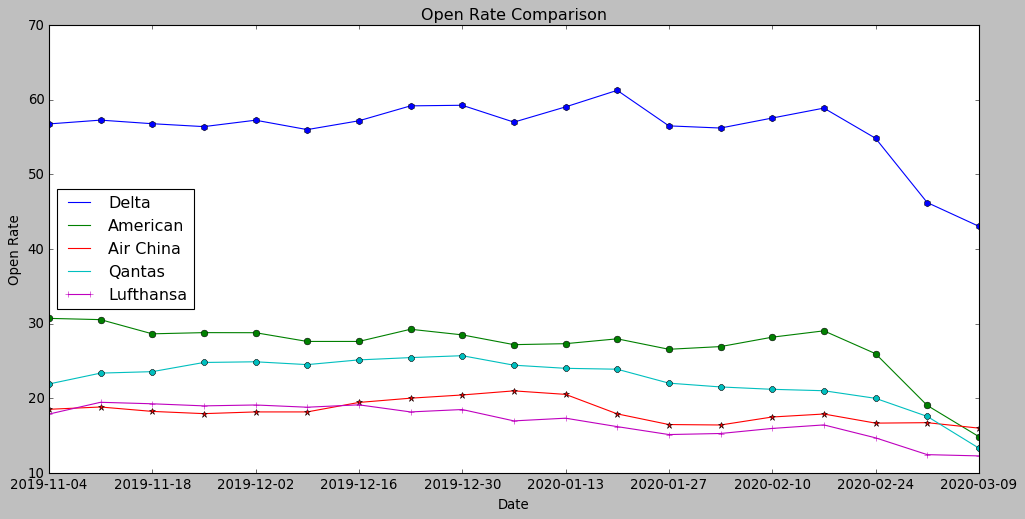

In [14]:
ax = plt.gca()
#plt.legend(loc='upper left', shadow=True, fontsize='x-large')
Delta_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='h',label='Delta',x_compat=True)
American_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='o',label='American',x_compat=True)
Airchina_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='*',label='Air China',x_compat=True)
Qantas_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='8',label='Qantas',x_compat=True)
Lufthansa_df.plot(kind='line',x='Date',y='Open',ax=ax,figsize = (15,7),marker='+',label='Lufthansa',x_compat=True)


plt.title("Open Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Open Rate");

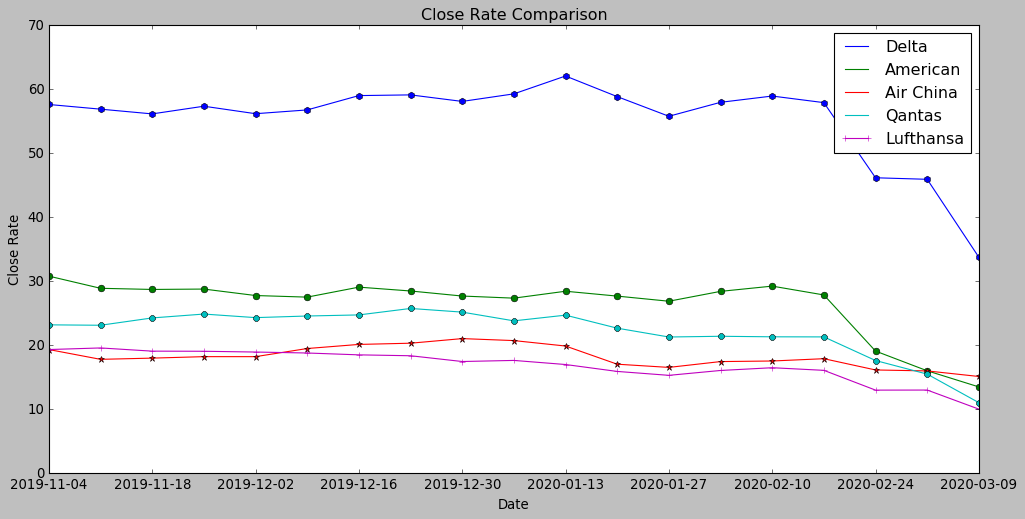

In [15]:
ax = plt.gca()

Delta_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='h',label='Delta',x_compat=True)
American_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='o',label='American',x_compat=True)
Airchina_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='*',label='Air China',x_compat=True)
Qantas_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='8',label='Qantas',x_compat=True)
Lufthansa_df.plot(kind='line',x='Date',y='Close',ax=ax,figsize = (15,7),marker='+',label='Lufthansa',x_compat=True)


plt.title("Close Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Close Rate");

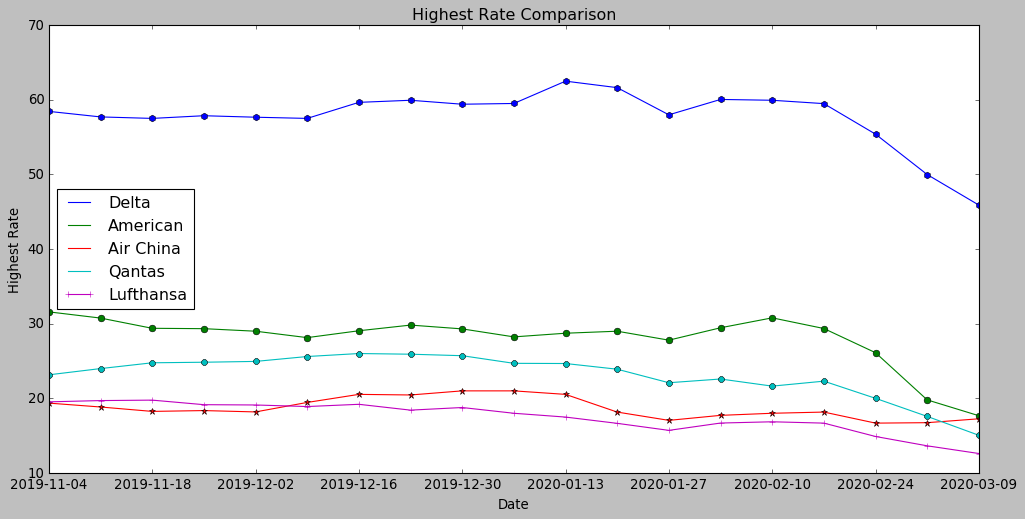

In [17]:
ax = plt.gca()


Delta_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='h',label='Delta',x_compat=True)
American_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='o',label='American',x_compat=True)
Airchina_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='*',label='Air China',x_compat=True)
Qantas_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='8',label='Qantas',x_compat=True)
Lufthansa_df.plot(kind='line',x='Date',y='High',ax=ax,figsize = (15,7),marker='+',label='Lufthansa',x_compat=True)


plt.title("Highest Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Highest Rate");

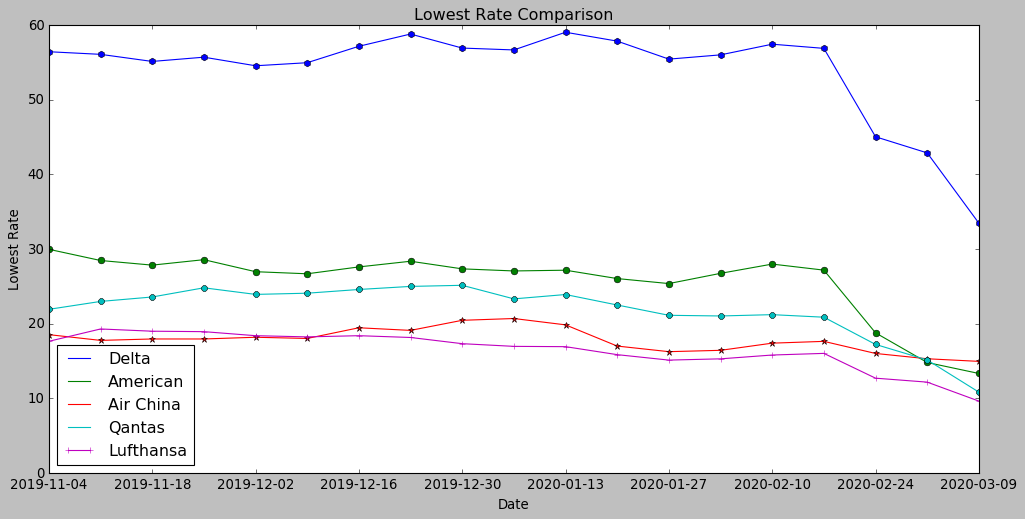

In [18]:
ax = plt.gca()

Delta_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='h',label='Delta',x_compat=True)
American_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='o',label='American',x_compat=True)
Airchina_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='*',label='Air China',x_compat=True)
Qantas_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='8',label='Qantas',x_compat=True)
Lufthansa_df.plot(kind='line',x='Date',y='Low',ax=ax,figsize = (15,7),marker='+',label='Lufthansa',x_compat=True)


plt.title("Lowest Rate Comparison")
plt.xlabel("Date")
plt.ylabel("Lowest Rate");

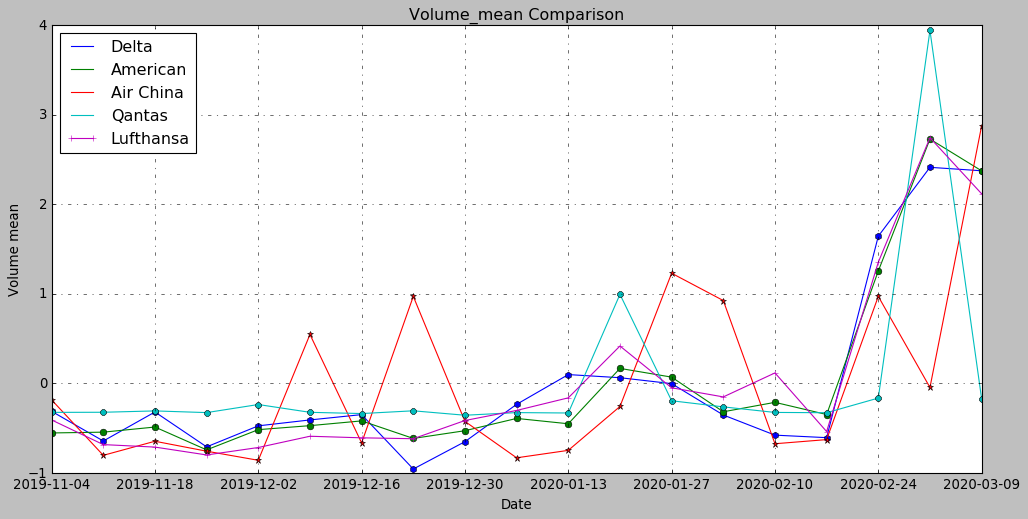

In [19]:
ax = plt.gca()
Delta_df['Volume_mean']=(Delta_df['Volume']-Delta_df['Volume'].mean())/Delta_df['Volume'].std()
American_df['Volume_mean']=(American_df['Volume']-American_df['Volume'].mean())/American_df['Volume'].std()
Airchina_df['Volume_mean']=(Airchina_df['Volume']-Airchina_df['Volume'].mean())/Airchina_df['Volume'].std()
Qantas_df['Volume_mean']=(Qantas_df['Volume']-Qantas_df['Volume'].mean())/Qantas_df['Volume'].std()
Lufthansa_df['Volume_mean']=(Lufthansa_df['Volume']-Lufthansa_df['Volume'].mean())/Lufthansa_df['Volume'].std()
Delta_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='h',label='Delta',x_compat=True)
American_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='o',label='American',x_compat=True)
Airchina_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='*',label='Air China',x_compat=True)
Qantas_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='8',label='Qantas',x_compat=True)
Lufthansa_df.plot(kind='line',x='Date',y='Volume_mean',ax=ax,figsize = (15,7),marker='+',label='Lufthansa',x_compat=True)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
#datacursor(formatter=formatter, hover=True)
plt.title("Volume_mean Comparison")
plt.xlabel("Date")
plt.ylabel("Volume mean");

In [20]:
# Define the minumum of periods to consider 
min_periods = 2

# Calculate the volatility
Delta_volatility=np.log(Delta_df['Adj Close'].pct_change()+1)
Delta_volatility.fillna(0,inplace=True)
Delta_volatility=Delta_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Delta_df['Volatility']=Delta_volatility

Airchina_volatility=np.log(Airchina_df['Adj Close'].pct_change()+1)
Airchina_volatility.fillna(0,inplace=True)
Airchina_volatility=Airchina_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Airchina_df['Volatility']=Airchina_volatility

American_volatility=np.log(American_df['Adj Close'].pct_change()+1)
American_volatility.fillna(0,inplace=True)
American_volatility=American_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
American_df['Volatility']=American_volatility

Qantas_volatility=np.log(Qantas_df['Adj Close'].pct_change()+1)
Qantas_volatility.fillna(0,inplace=True)
Qantas_volatility=Qantas_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Qantas_df['Volatility']=Qantas_volatility

Lufthansa_volatility=np.log(Lufthansa_df['Adj Close'].pct_change()+1)
Lufthansa_volatility.fillna(0,inplace=True)
Lufthansa_volatility=Lufthansa_volatility.rolling(min_periods).std() * np.sqrt(min_periods) 
Lufthansa_df['Volatility']=Lufthansa_volatility


Delta_df['HL_PCT'] = (Delta_df['High'] - Delta_df['Low']) / Delta_df['Close'] * 100.0
Delta_df['PCT_change'] = (Delta_df['Close'] - Delta_df['Open']) / Delta_df['Open'] * 100.0

Airchina_df['HL_PCT'] = (Airchina_df['High'] - Airchina_df['Low']) / Airchina_df['Close'] * 100.0
Airchina_df['PCT_change'] = (Airchina_df['Close'] - Airchina_df['Open']) / Airchina_df['Open'] * 100.0

American_df['HL_PCT'] = (American_df['High'] - American_df['Low']) / American_df['Close'] * 100.0
American_df['PCT_change'] = (American_df['Close'] - American_df['Open']) / American_df['Open'] * 100.0

Qantas_df['HL_PCT'] = (Qantas_df['High'] - Qantas_df['Low']) / Qantas_df['Close'] * 100.0
Qantas_df['PCT_change'] = (Qantas_df['Close'] - Qantas_df['Open']) / Qantas_df['Open'] * 100.0

Lufthansa_df['HL_PCT'] = (Lufthansa_df['High'] - Lufthansa_df['Low']) / Lufthansa_df['Close'] * 100.0
Lufthansa_df['PCT_change'] = (Lufthansa_df['Close'] - Lufthansa_df['Open']) / Lufthansa_df['Open'] * 100.0

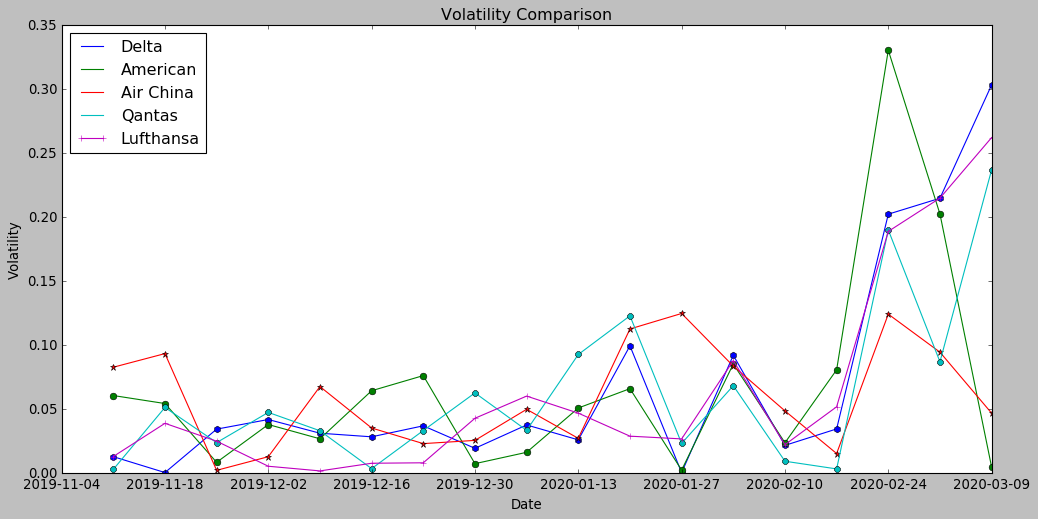

In [21]:
#file.plot(x="Date",y="Volume")
ax = plt.gca()

#plt.legend(loc='upper left', shadow=True, fontsize='x-large')
Delta_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='h',label='Delta',x_compat=True)
American_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='o',label='American',x_compat=True)
Airchina_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='*',label='Air China',x_compat=True)
Qantas_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='8',label='Qantas',x_compat=True)
Lufthansa_df.plot(kind='line',x='Date',y='Volatility',ax=ax,figsize = (15,7),marker='+',label='Lufthansa',x_compat=True)

#datacursor(formatter=formatter, hover=True)
plt.title("Volatility Comparison")
plt.xlabel("Date")
plt.ylabel("Volatility");

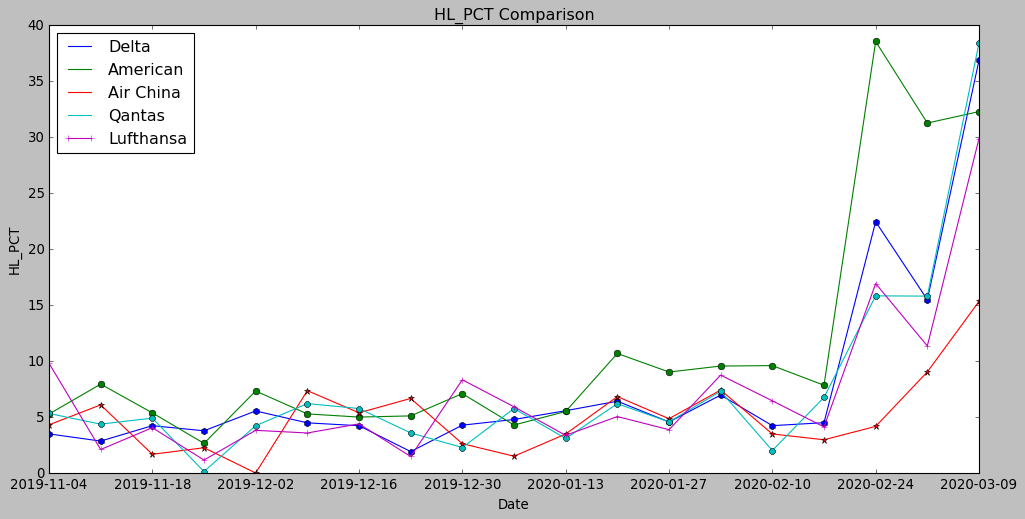

In [22]:
#file.plot(x="Date",y="Volume")
ax = plt.gca()

#plt.legend(loc='upper left', shadow=True, fontsize='x-large')
Delta_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='h',label='Delta',x_compat=True)
American_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='o',label='American',x_compat=True)
Airchina_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='*',label='Air China',x_compat=True)
Qantas_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='8',label='Qantas',x_compat=True)
Lufthansa_df.plot(kind='line',x='Date',y='HL_PCT',ax=ax,figsize = (15,7),marker='+',label='Lufthansa',x_compat=True)

#datacursor(formatter=formatter, hover=True)
plt.title("HL_PCT Comparison")
plt.xlabel("Date")
plt.ylabel("HL_PCT");

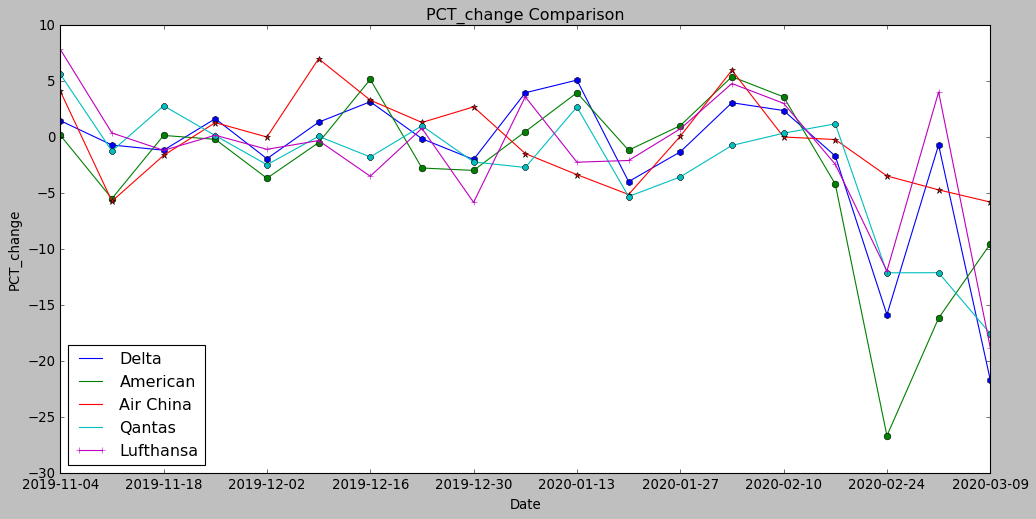

In [23]:
#file.plot(x="Date",y="Volume")
ax = plt.gca()

#plt.legend(loc='upper left', shadow=True, fontsize='x-large')
Delta_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='h',label='Delta',x_compat=True)
American_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='o',label='American',x_compat=True)
Airchina_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='*',label='Air China',x_compat=True)
Qantas_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='8',label='Qantas',x_compat=True)
Lufthansa_df.plot(kind='line',x='Date',y='PCT_change',ax=ax,figsize = (15,7),marker='+',label='Lufthansa',x_compat=True)

#datacursor(formatter=formatter, hover=True)
plt.title("PCT_change Comparison")
plt.xlabel("Date")
plt.ylabel("PCT_change");

In [28]:
#scatter matrix plot 
from pandas.plotting import scatter_matrix
airline_comp = pd.concat([Airchina_df['Open'],American_df['Open'],Delta_df['Open'],
                          Lufthansa_df['Open'],Qantas_df['Open']],axis =1)

In [29]:
airline_comp.columns = ['Airchina_df Open', 'American_df Open','Delta_df Open',
                       'Lufthansa_df Open', 'Qantas_df Open']

In [30]:
airline_comp.head()

,Airchina_df Open,American_df Open,Delta_df Open,Lufthansa_df Open,Qantas_df Open
0,18.530001,30.709999,56.750000,17.889999,21.920000
1,18.840000,30.540001,57.259998,19.469999,23.378000
2,18.250000,28.639999,56.779999,19.270000,23.573000
3,17.950001,28.799999,56.389999,18.990000,24.802999
4,18.180000,28.790001,57.250000,19.110001,24.895000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1425c8940>,
      dtype=object)

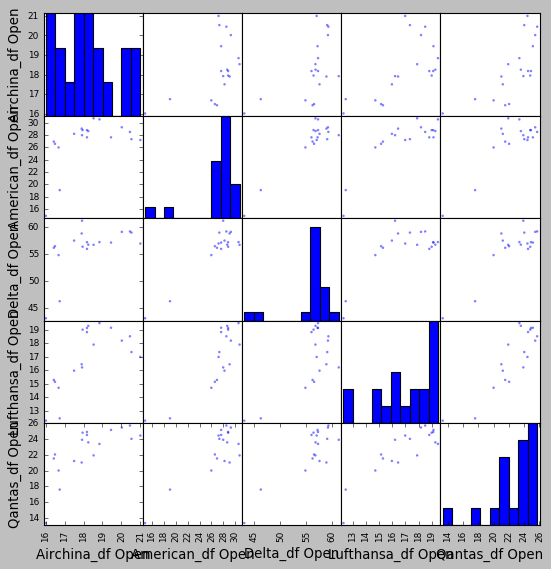

In [31]:
# to see relationship between these airlines company by opening price
scatter_matrix(airline_comp, figsize=(8,8))

In [33]:
#scatter matrix plot Close 
from pandas.plotting import scatter_matrix
airline_comp = pd.concat([Airchina_df['Close'],American_df['Close'],Delta_df['Close'],
                          Lufthansa_df['Close'],Qantas_df['Close']],axis =1)

In [38]:
airline_comp.columns = ['Airchina_df Close', 'American_df Close','Delta_df Close',
                       'Lufthansa_df Cpen', 'Qantas_df Cpen']

In [39]:
airline_comp.head()

,Airchina_df Close,American_df Close,Delta_df Close,Lufthansa_df Cpen,Qantas_df Cpen
0,7300,28354200,30775300,160500,5400
1,600,28869500,20460900,66700,5600
2,2300,32169300,30546100,57200,8000
3,1100,17456600,18426600,27300,5000
4,0,30480300,25728100,55600,19400


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x141070d68>,
      dtype=object)

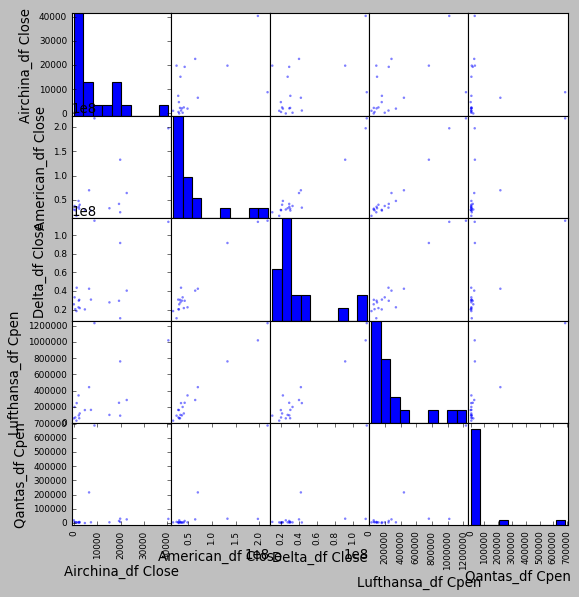

In [40]:
# to see relationship between these airlines company by closing price
scatter_matrix(airline_comp, figsize=(8,8))

In [37]:
#scatter matrix plot 
from pandas.plotting import scatter_matrix
airline_comp = pd.concat([Airchina_df['Volume'],American_df['Volume'],Delta_df['Volume'],
                          Lufthansa_df['Volume'],Qantas_df['Volume']],axis =1)

In [41]:
airline_comp.columns = ['Airchina_df Volume', 'American_df Volume','Delta_df Volume',
                       'Lufthansa_df Volume', 'Qantas_df Volume']

In [42]:
airline_comp.head()

,Airchina_df Volume,American_df Volume,Delta_df Volume,Lufthansa_df Volume,Qantas_df Volume
0,7300,28354200,30775300,160500,5400
1,600,28869500,20460900,66700,5600
2,2300,32169300,30546100,57200,8000
3,1100,17456600,18426600,27300,5000
4,0,30480300,25728100,55600,19400


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14337d278>,
      dtype=object)

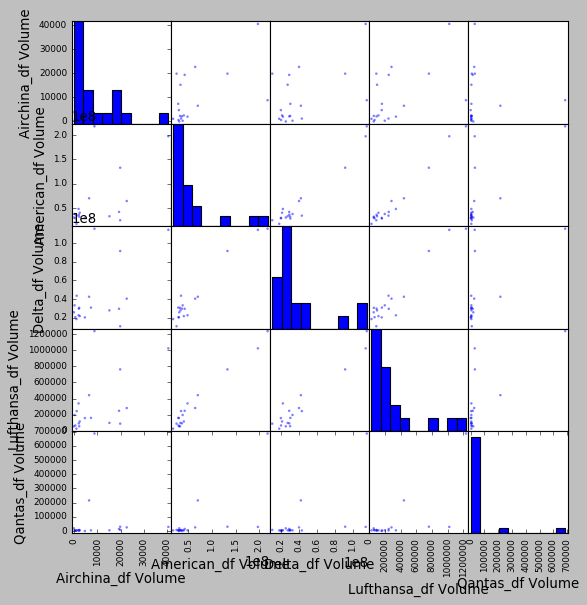

In [43]:
# to see relationship between these airlines company by volume price
scatter_matrix(airline_comp, figsize=(8,8))

TIME SERIES ANALYSIS WITH PANDAS DATA READER

In [29]:
#Time series
Airchina_df = pdr.get_data_yahoo('AIRYY',
                        start=datetime.datetime(2019,11,29),
                        end=datetime.datetime(2020,4,3))
American_df = pdr.get_data_yahoo('AAL',
                        start=datetime.datetime(2019,11,29),
                        end=datetime.datetime(2020,4,3))

Qantas_df = pdr.get_data_yahoo('QABSY',
                        start=datetime.datetime(2019,11,29),
                        end=datetime.datetime(2020,4,3))
Lufthansa_df = pdr.get_data_yahoo('DLAKY',
                        start=datetime.datetime(2019,11,29),
                        end=datetime.datetime(2020,4,3))
Delta_df = pdr.get_data_yahoo('DAL',
                        start=datetime.datetime(2019,11,29),
                        end=datetime.datetime(2020,4,3))

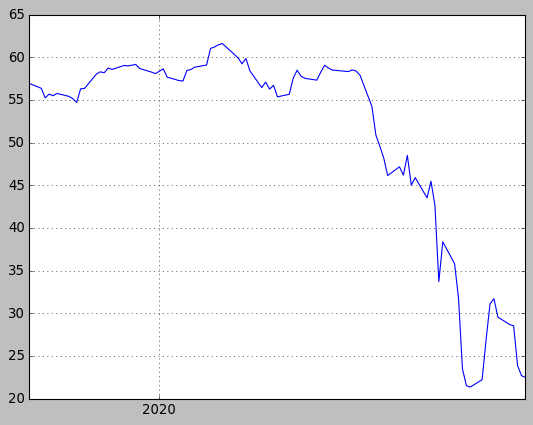

In [30]:
#Delta Time series
plt.plot(Delta_df.index, Delta_df['Adj Close'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.grid(True)
plt.show()


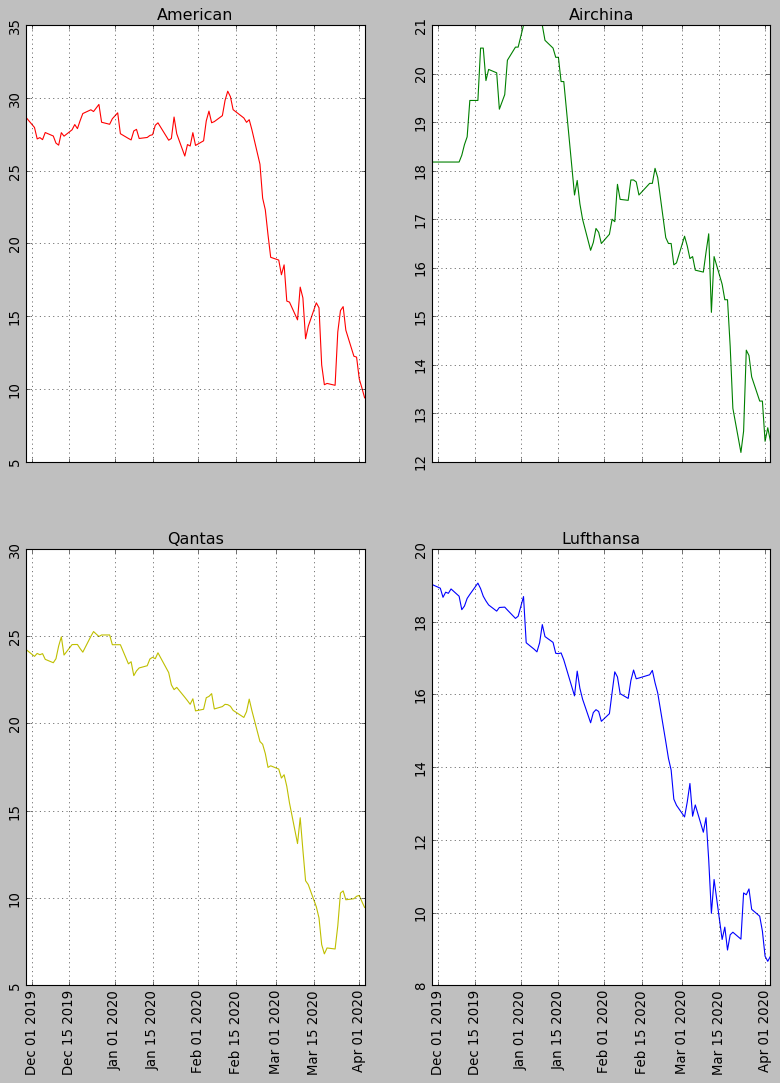

In [12]:
f, ax = plt.subplots(2, 2, figsize=(12,15), sharex=True)
f.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
f.gca().xaxis.set_major_locator(mdates.YearLocator())

ax[0,0].plot(American_df.index, American_df['Adj Close'], color='r')
ax[0,0].grid(True)
ax[0,0].tick_params(labelrotation=90)
ax[0,0].set_title('American');

ax[0,1].plot(Airchina_df.index, Airchina_df['Adj Close'], color='g')
ax[0,1].grid(True)
ax[0,1].tick_params(labelrotation=90)
ax[0,1].set_title('Airchina');

ax[1,0].plot(Qantas_df.index, Qantas_df['Adj Close'], color='y')
ax[1,0].grid(True)
ax[1,0].tick_params(labelrotation=90)
ax[1,0].set_title('Qantas');

ax[1,1].plot(Lufthansa_df.index, Lufthansa_df['Adj Close'], color='b')
ax[1,1].grid(True)
ax[1,1].tick_params(labelrotation=90)
ax[1,1].set_title('Lufthansa');


Daily Percentage

In [13]:
Daily_close_American_df = American_df[['Adj Close']]

# Daily returns from stocks
Daily_pct_change_American_df = Daily_close_American_df.pct_change()

# Replace NA values with 0
Daily_pct_change_American_df.fillna(0, inplace=True)

Daily_pct_change_American_df.head()

,Adj Close
Date,
2019-11-29,0.000000
2019-12-02,-0.022965
2019-12-03,-0.028134
2019-12-04,0.003298
2019-12-05,-0.005113


In [14]:
Daily_close_Airchina_df = Airchina_df[['Adj Close']]

# Daily returns from stocks
Daily_pct_change_Airchina_df = Daily_close_Airchina_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Airchina_df.fillna(0, inplace=True)

Daily_pct_change_Airchina_df.head()

,Adj Close
Date,
2019-11-29,0.0
2019-12-02,0.0
2019-12-03,0.0
2019-12-04,0.0
2019-12-05,0.0


In [15]:
Daily_close_Delta_df = Delta_df[['Adj Close']]

# Daily returns from stocks
Daily_pct_change_Delta_df = Daily_close_Delta_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Delta_df.fillna(0, inplace=True)

Daily_pct_change_Delta_df.head()

,Adj Close
Date,
2019-11-29,0.000000
2019-12-02,-0.009771
2019-12-03,-0.019912
2019-12-04,0.007911
2019-12-05,-0.003211


In [16]:
Daily_close_Lufthansa_df = Lufthansa_df[['Adj Close']]

# Daily returns from stocks
Daily_pct_change_Lufthansa_df = Daily_close_Delta_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Lufthansa_df.fillna(0, inplace=True)

Daily_pct_change_Lufthansa_df.head()

,Adj Close
Date,
2019-11-29,0.000000
2019-12-02,-0.009771
2019-12-03,-0.019912
2019-12-04,0.007911
2019-12-05,-0.003211


In [17]:
Daily_close_Qantas_df = Qantas_df[['Adj Close']]

# Daily returns from stocks
Daily_pct_change_Qantas_df = Daily_close_Qantas_df.pct_change()

# Replace NA values with 0
Daily_pct_change_Qantas_df.fillna(0, inplace=True)

Daily_pct_change_Qantas_df.head()

,Adj Close
Date,
2019-11-29,0.000000
2019-12-02,-0.015382
2019-12-03,0.007034
2019-12-04,-0.003046
2019-12-05,0.002566


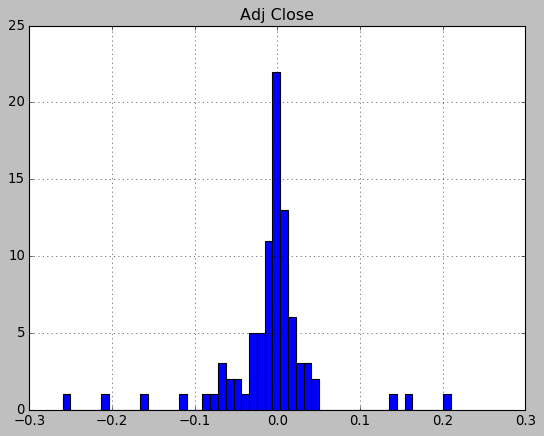

In [18]:

Daily_pct_change_Delta_df.hist(bins=50)

# Show the plot
plt.show()

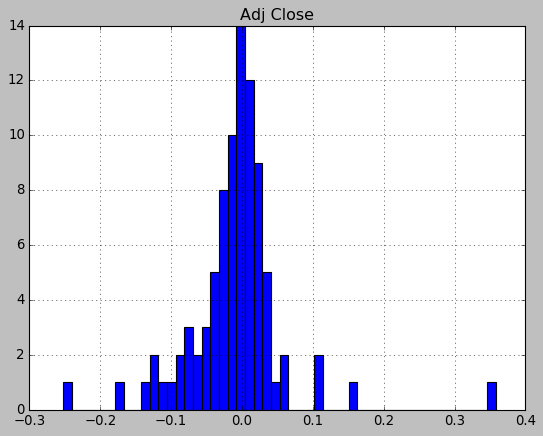

In [19]:

Daily_pct_change_American_df.hist(bins=50)

# Show the plot
plt.show()

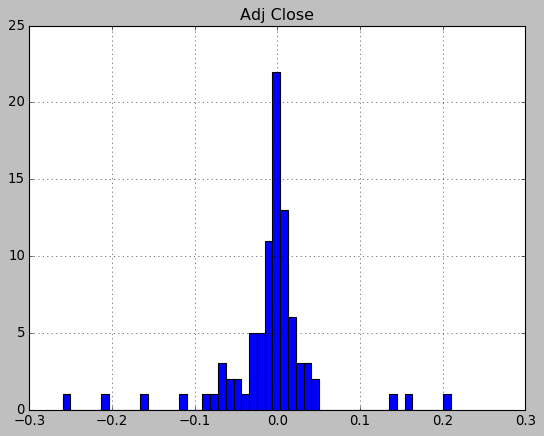

In [20]:

Daily_pct_change_Lufthansa_df.hist(bins=50)

# Show the plot
plt.show()

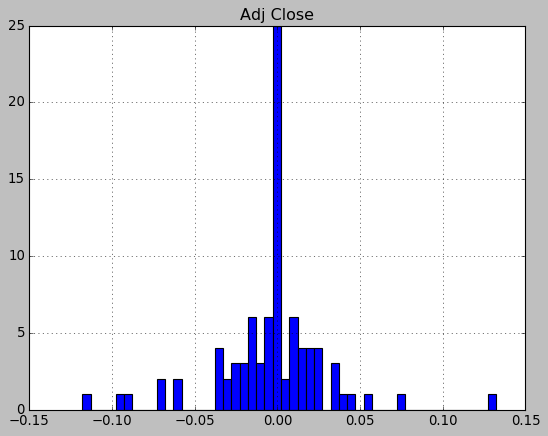

In [21]:

Daily_pct_change_Airchina_df.hist(bins=50)

# Show the plot
plt.show()

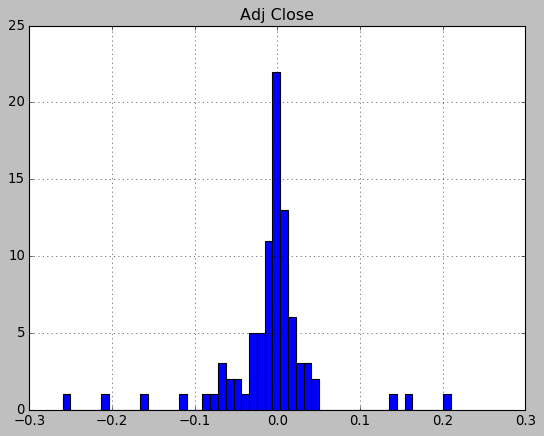

In [22]:

Daily_pct_change_Delta_df.hist(bins=50)

# Show the plot
plt.show()

Using seabon to check the confidnce interval of Each company

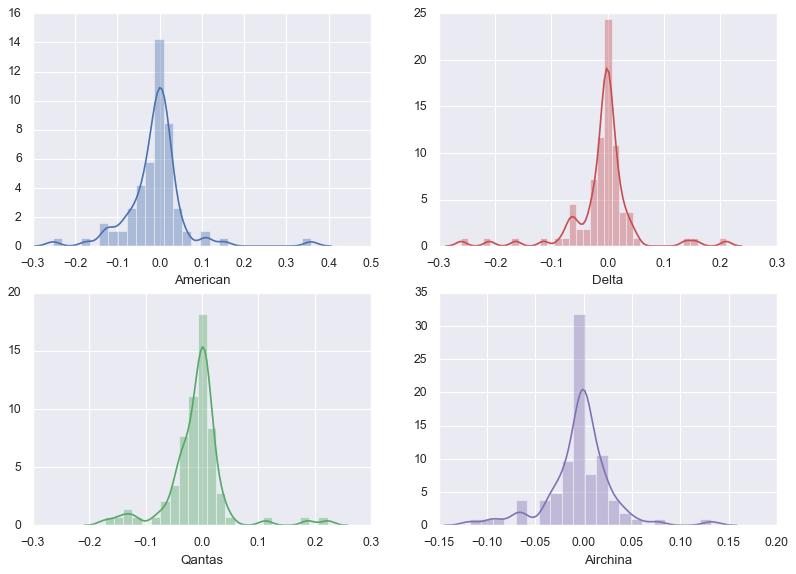

In [36]:
#  matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot a simple histogram with binsize determined automatically
sns.distplot(Daily_pct_change_American_df['Adj Close'], color="b", ax=axes[0, 0], axlabel='American');

sns.distplot(Daily_pct_change_Delta_df['Adj Close'], color="r", ax=axes[0, 1], axlabel='Delta');

sns.distplot(Daily_pct_change_Qantas_df['Adj Close'], color="g", ax=axes[1, 0], axlabel='Qantas');

# Ploting a historgram and kernel density estimate
sns.distplot(Daily_pct_change_Airchina_df['Adj Close'], color="m", ax=axes[1, 1], axlabel='Airchina');
sns.set();

Rolling Mean Analysis

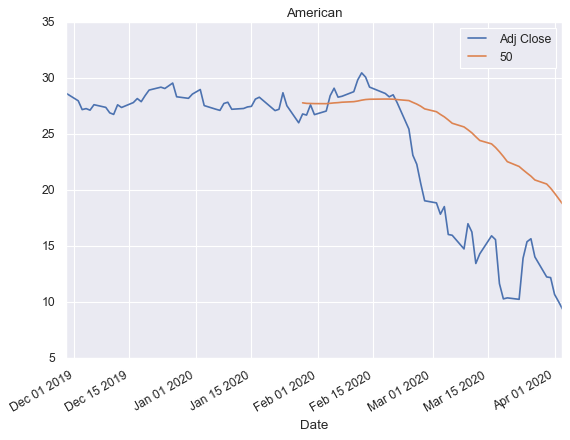

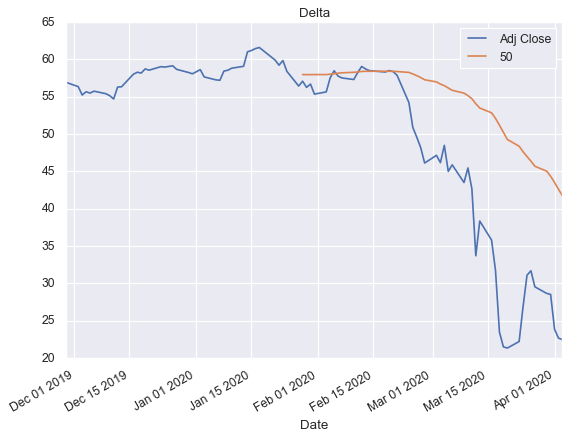

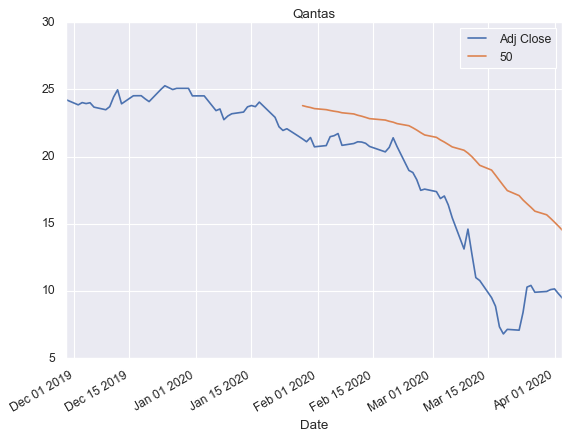

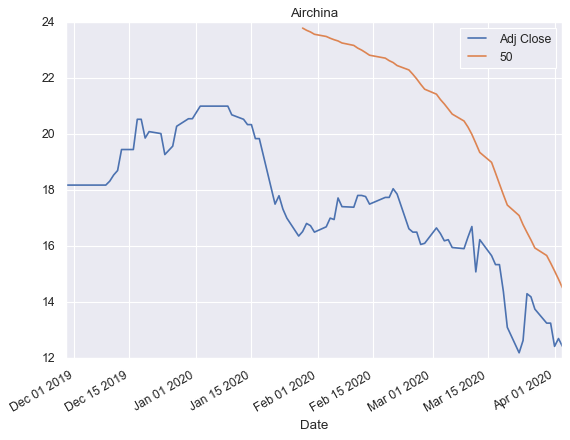

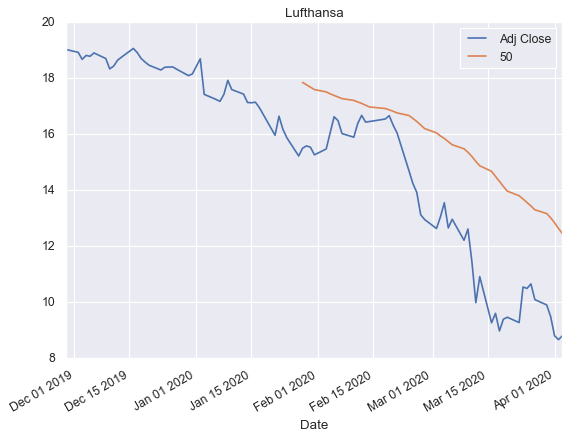

In [43]:
American_df_adj_close_px = American_df['Adj Close']
# Short moving window rolling mean
American_df['50'] = American_df_adj_close_px.rolling(window=40).mean()


# Plot the adjusted closing price, the short and long windows of rolling means
American_df[['Adj Close', '50']].plot(title="American")

# Show plot
plt.show()

Delta_df_adj_close_px = Delta_df['Adj Close']
# Short moving window rolling mean
Delta_df['50'] = Delta_df_adj_close_px.rolling(window=40).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
Delta_df[['Adj Close', '50']].plot(title="Delta")

# Show plot
plt.show()

Qantas_df_adj_close_px = Qantas_df['Adj Close']
# Short moving window rolling mean
Qantas_df['50'] = Qantas_df_adj_close_px.rolling(window=40).mean()


# Plot the adjusted closing price, the short and long windows of rolling means
Qantas_df[['Adj Close', '50']].plot(title="Qantas")

# Show plot
plt.show()

Airchina_df_adj_close_px = Qantas_df['Adj Close']
# Short moving window rolling mean
Airchina_df['50'] = Airchina_df_adj_close_px.rolling(window=40).mean()


# Plot the adjusted closing price, the short and long windows of rolling means
Airchina_df[['Adj Close', '50']].plot(title="Airchina")


Lufthansa_df_adj_close_px = Lufthansa_df['Adj Close']
# Short moving window rolling mean
Lufthansa_df['50'] = Lufthansa_df_adj_close_px.rolling(window=40).mean()


# Plot the adjusted closing price, the short and long windows of rolling means
Lufthansa_df[['Adj Close', '50']].plot(title="Lufthansa")

# Show plot
plt.show()

